In [1]:
from functions.load_all_data import load_imgs_masks
from functions.sizes import compute_avg_size
from functions.composites import composite_masks
from skimage.transform import rescale, resize
import numpy as np
import matplotlib.pyplot as plt

In [2]:
all_imgs, mask_colls = load_imgs_masks()[:2]

In [3]:
ex_imgs, ex_masks = all_imgs[:9], mask_colls[:9]

In [4]:
for i in range(len(ex_masks)):
    mask = ex_masks[i]
    ex_masks[i] = composite_masks(mask)

In [5]:
for img in ex_imgs[:2]:
    print(img.shape)

(256, 256, 4)
(520, 696, 4)


In [6]:
sample_img = ex_imgs[1]
sample_mask = ex_masks[1]

curr_size = compute_avg_size(sample_mask)
target_size = curr_size * 2

ratio = curr_size / target_size

In [7]:
rescaled = rescale(sample_mask, ratio, anti_aliasing=False, preserve_range=True)

0.5


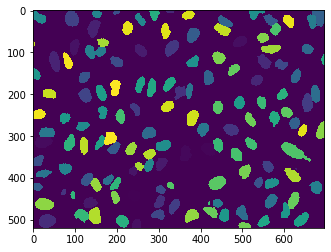

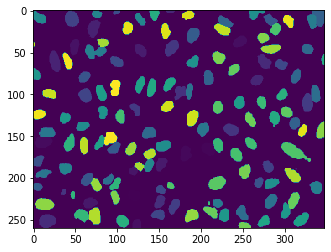

In [8]:
plt.imshow(sample_mask); plt.figure()
plt.imshow(rescaled)
print(ratio)

In [9]:
len(np.unique(rescaled))

1743

(260, 348)

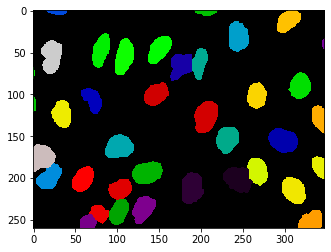

In [10]:
zeros = np.zeros(sample_mask.shape[0:2])
center = (sample_mask.shape[0] * .5, sample_mask.shape[1] * .5)
new_size = (sample_mask.shape[0] * ratio, sample_mask.shape[1] * ratio)

left = max(0, int(center[0] - new_size[0] / 2))
right = min(sample_mask.shape[0], int(center[0] + new_size[0] / 2))
upper = max(0, int(center[1] - new_size[1] / 2))
lower = min(sample_mask.shape[1], int(center[1] + new_size[1] / 2))

cropped_img = sample_mask[left:right, upper:lower]
plt.imshow(cropped_img, cmap='nipy_spectral')
cropped_img.shape

(520, 696)

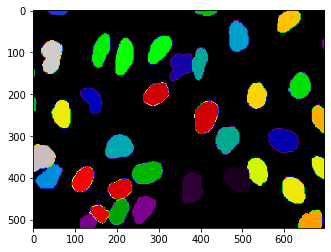

In [11]:
resized_img = resize(cropped_img, (sample_mask.shape[0:2]), anti_aliasing=False, preserve_range=True)
resized_img = resized_img % len(np.unique(resized_img))
plt.imshow(resized_img, cmap='nipy_spectral')
resized_img.shape

In [13]:
resized_size = compute_avg_size(resized_img)
print("Original size = %f\nNew size = %f" %(curr_size, resized_size))

Original size = 617.099291
New size = 43.120151


In [14]:
len(np.unique(resized_img))

2115

In [15]:
for i in range(24):
    print(np.unique(resized_img)[i])

0.0
0.12499999999991473
0.12499999999998579
0.125
0.1250000000000142
0.12500000000007105
0.18749999999989342
0.18749999999997868
0.1875
0.18750000000002132
0.18750000000010658
0.1875000000001279
0.37499999999982947
0.3749999999999005
0.37499999999991473
0.37499999999992895
0.37500000000004263
0.37500000000008527
0.3750000000001279
0.3750000000001563
0.49999999999982947
0.4999999999998579
0.49999999999991473
0.5000000000000853


In [16]:
cropped_size = compute_avg_size(cropped_img)
print(cropped_size)
len(np.unique(cropped_img))

549.9736842105264


39

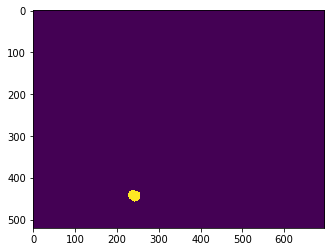

In [18]:
for color in np.unique(sample_mask):
    if color != 0:
        plt.imshow(sample_mask == color)
        break

In [ ]:
# write decompose function which takes each mask from a composite and returns the collection
# resize each decomposed image individually and then combine them again